### Extração e clonagem

In [19]:
import pandas as pd
import numpy as np


In [20]:
url = "https://info.dengue.mat.br/api/alertcity"
geocode = 4205407
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2023
ey_end = 2023

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start=" 
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"    
)

url_resp = "?".join([url, params])
url_resp

'https://info.dengue.mat.br/api/alertcity?&disease=dengue&geocode=4205407&disease=dengue&format=csv&ew_start=1&ew_end=53&ey_start=2023&ey_end=2023'

In [21]:
dados = pd.read_csv(url_resp, index_col='SE')
dados.T

SE,202352,202351,202350,202349,202348,202347,202346,202345,202344,202343,...,202310,202309,202308,202307,202306,202305,202304,202303,202302,202301
data_iniSE,2023-12-24,2023-12-17,2023-12-10,2023-12-03,2023-11-26,2023-11-19,2023-11-12,2023-11-05,2023-10-29,2023-10-22,...,2023-03-05,2023-02-26,2023-02-19,2023-02-12,2023-02-05,2023-01-29,2023-01-22,2023-01-15,2023-01-08,2023-01-01
casos_est,299.0,358.0,366.0,313.0,256.0,182.0,156.0,194.0,159.0,165.0,...,1205.0,631.0,301.0,220.0,185.0,112.0,93.0,73.0,80.0,72.0
casos_est_min,299,358,366,313,256,182,156,194,159,165,...,1205,631,301,220,185,112,93,73,80,72
casos_est_max,299,358,366,313,256,182,156,194,159,165,...,1205,631,301,220,185,112,93,73,80,72
casos,299,358,366,313,256,182,156,194,159,165,...,1205,631,301,220,185,112,93,73,80,72
p_rt1,0.055735,0.979853,0.999998,1.0,0.999939,0.682068,0.24957,0.951224,0.507519,0.706721,...,1.0,1.0,1.0,1.0,1.0,0.987067,0.910287,0.547497,0.875573,0.821939
p_inc100k,52.07245,62.347614,63.740856,54.510624,44.583767,31.696274,27.168234,33.786137,27.6907,28.735632,...,209.8572,109.89202,52.42076,38.314175,32.21874,22.011454,18.277369,14.346751,15.722467,14.15022
Localidade_id,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nivel,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
id,420540720235219815,420540720235119815,420540720235019815,420540720234919815,420540720234819815,420540720234719815,420540720234619815,420540720234519815,420540720234419815,420540720234319815,...,420540720231019795,420540720230919787,420540720230819780,420540720230719774,420540720230619768,420540720230519760,420540720230419752,420540720230319748,420540720230219748,420540720230119741


### Número de casos por semana

In [23]:
this_week = dados.index.max()
last_week = this_week - 1
cases_this_week = dados.loc[this_week]['casos_est']
cases_last_week = dados.loc[last_week]['casos_est']

print(dados.loc[this_week:].T)

SE                            202352              202351              202350  \
data_iniSE                2023-12-24          2023-12-17          2023-12-10   
casos_est                      299.0               358.0               366.0   
casos_est_min                    299                 358                 366   
casos_est_max                    299                 358                 366   
casos                            299                 358                 366   
p_rt1                       0.055735            0.979853            0.999998   
p_inc100k                   52.07245           62.347614           63.740856   
Localidade_id                      0                   0                   0   
nivel                              4                   4                   4   
id                420540720235219815  420540720235119815  420540720235019815   
versao_modelo             2024-04-02          2024-04-02          2024-04-02   
tweet                            0.0    

In [24]:
import plotly.graph_objects as go
from plotly.offline import iplot


trace1  = go.Scatter(
        mode='lines+markers',
        x=dados.index.map(
            lambda v: '%s' % (str(v)[-6:])
        ),
        y=dados['casos_est'],
        name="Casos estimados",
        marker_color='#1A5CF4',
        hovertemplate=(
            '%{text}' +
            '<br>' +
            '%{y:1f} Casos estimados' +
            '<extra></extra>'
        ),
        text="SE: " + dados.index.map(lambda v: '{}'.format(str(v)[-2:]))  + 
             "<br>" + 
             "Data: " + dados.data_iniSE.loc[dados.index],  
        )
  

trace2 = go.Bar(
        x=dados.index.map(
            lambda v: '%s' % (str(v)[-6:])
        ),
        y=dados['casos'],
        name="Casos reportados",
        marker_color ='#BAF3FE',
        marker_line_color='rgb(8,48,107)',
        opacity=0.5,
        hovertemplate=(
            '%{text}' +
            '<br>' +
            '%{y:1f} Casos reportados' +
            '<extra></extra>'
        ),
        text="SE: " + dados.index.map(lambda v: '{}'.format(str(v)[-2:]))  + 
             "<br>" + 
             "Date: " + dados.data_iniSE.loc[dados.index],  
    )

trace3 = go.Indicator(
    mode = "number+delta",
    value = cases_this_week,
    delta={
        'reference': cases_last_week,
        'increasing': {'color': "#e60000"},
        'decreasing': {'color': "#1e824c"},
        "font": {"size": 36},
    },
    title = {
        "text": "SE:{} <br> Casos estimados".format(
            str(this_week)[-2:]
        )
    },
    domain = {'y': [0, 1], 'x': [0.25, 0.75]}
)

data = [trace1, trace2, trace3]

layout = go.Layout(
    title_text='Casos de dengue estimados e reportados em Florianópolis - SC',
    yaxis=dict(
        title_text='Número de casos',
        side = 'left',
        showline=False,
        showgrid=True,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=0,
        gridcolor='rgb(176, 196, 222)',
    ),
    xaxis=dict(
        title_text='Semana epidemiológica',
        showline=False,
        showgrid=True,
        showticklabels=True,
        tickangle=-60,
        linecolor='rgb(204, 204, 204)',
        linewidth=0,
        gridcolor='rgb(176, 196, 222)',

    ),
    showlegend=False,
    plot_bgcolor='rgb(255, 255, 255)',
    paper_bgcolor='rgb(245, 246, 249)',
    autosize=True,
)


fig = go.Figure(data=data, layout=layout)
fig.show()

### Estudo relacional de Casos/Temperatura/Umidade para o pico de casos

In [58]:
dados_sem_linha = dados.drop(dados.index[0])

In [59]:
dados_sem_linha

,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,id,...,umidmed,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year
SE,,,,,,,,,,,,,,,,,,,,,
202351,2023-12-17,358.0,358,358,358,9.798535e-01,62.347614,0,4,420540720235119815,...,83.823001,78.206395,26.189394,27.545455,NaN,NaN,NaN,NaN,NaN,53469
202350,2023-12-10,366.0,366,366,366,9.999983e-01,63.740856,0,4,420540720235019815,...,87.755018,83.330974,23.048387,24.225806,NaN,NaN,NaN,NaN,NaN,53469
202349,2023-12-03,313.0,313,313,313,9.999997e-01,54.510624,0,4,420540720234919815,...,75.287698,62.718651,22.034723,23.500000,NaN,NaN,NaN,NaN,NaN,53469
202348,2023-11-26,256.0,256,256,256,9.999395e-01,44.583767,0,4,420540720234819815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53469
202347,2023-11-19,182.0,182,182,182,6.820682e-01,31.696274,0,4,420540720234719815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53469
202346,2023-11-12,156.0,156,156,156,2.495703e-01,27.168234,0,4,420540720234619815,...,90.185786,89.622155,23.357143,23.357143,NaN,NaN,NaN,NaN,NaN,53469
202345,2023-11-05,194.0,194,194,194,9.512242e-01,33.786137,0,4,420540720234519815,...,79.225494,76.887027,20.880952,21.571429,NaN,NaN,NaN,NaN,NaN,53469
202344,2023-10-29,159.0,159,159,159,5.075192e-01,27.690700,0,4,420540720234419815,...,94.442781,91.723994,21.178571,21.571429,NaN,NaN,NaN,NaN,NaN,53469
202343,2023-10-22,165.0,165,165,165,7.067209e-01,28.735632,0,4,420540720234319815,...,84.388703,81.823763,20.785714,21.142857,NaN,NaN,NaN,NaN,NaN,53469


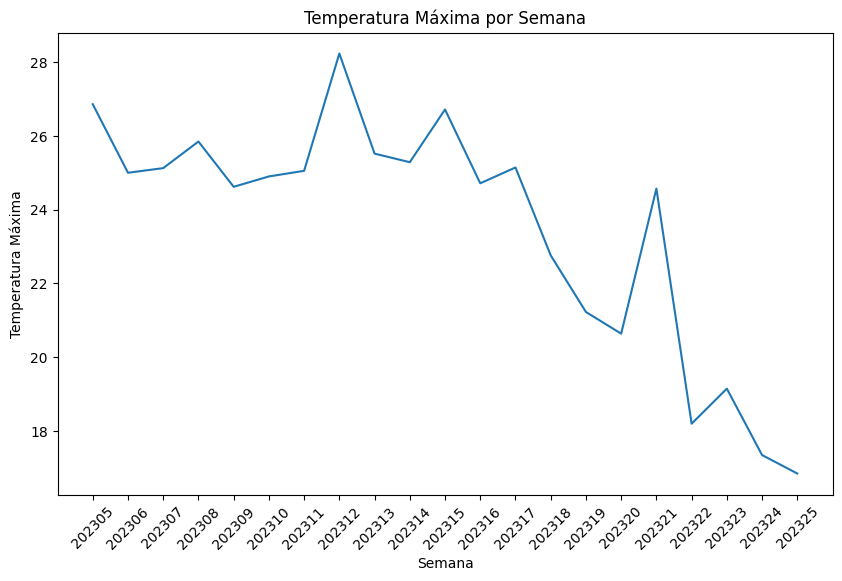

In [46]:
import matplotlib.pyplot as plt

# Filtrar as semanas e a temperatura máxima
filtered_data = dados_sem_linha.loc[week_filter, ['SE', 'tempmax']]

# Ordenar os dados pela semana
filtered_data = filtered_data.sort_values('SE')

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['SE'], filtered_data['tempmax'])
plt.xlabel('Semana')
plt.ylabel('Temperatura Máxima')
plt.title('Temperatura Máxima por Semana')
plt.xticks(rotation=45)
plt.show()

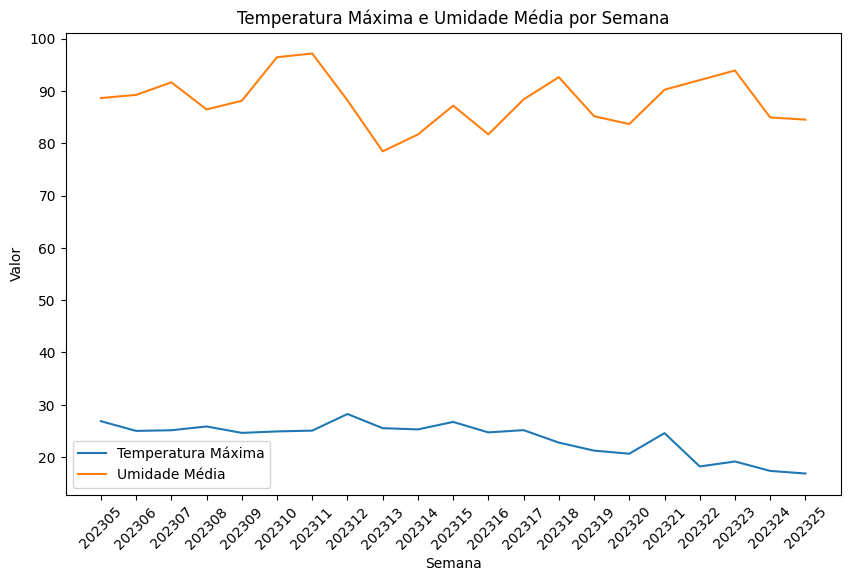

In [45]:
import matplotlib.pyplot as plt

# Filtrar as semanas, a temperatura máxima e a umidade média
filtered_data = dados_sem_linha.loc[week_filter, ['SE', 'tempmax', 'umidmed']]

# Ordenar os dados pela semana
filtered_data = filtered_data.sort_values('SE')

plt.figure(figsize=(10, 6))

# Plotar a temperatura máxima
plt.plot(filtered_data['SE'], filtered_data['tempmax'], label='Temperatura Máxima')

# Plotar a umidade média
plt.plot(filtered_data['SE'], filtered_data['umidmed'], label='Umidade Média')

plt.xlabel('Semana')
plt.ylabel('Valor')
plt.title('Temperatura Máxima e Umidade Média por Semana')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [48]:
dados_sem_linha = dados.iloc[1:]

In [55]:
dados_sem_linha['SE'] = dados_sem_linha['SE'].astype(str)
week_filter = (dados_sem_linha['SE'] >= '202305') & (dados_sem_linha['SE'] <= '202325')

KeyError: 'SE'

In [27]:
tempmax_filtered = dados_sem_linha.loc[week_filter, 'tempmed']
variation = tempmax_filtered.max() - tempmax_filtered.min()
print(variation)

9.070476


In [41]:
# Filtrar as semanas e a temperatura máxima
filtered_data = dados_sem_linha.loc[week_filter, ['SE', 'tempmax', 'umidmed']]
# Ordenar os dados pela semana
filtered_data = filtered_data.sort_values('SE')




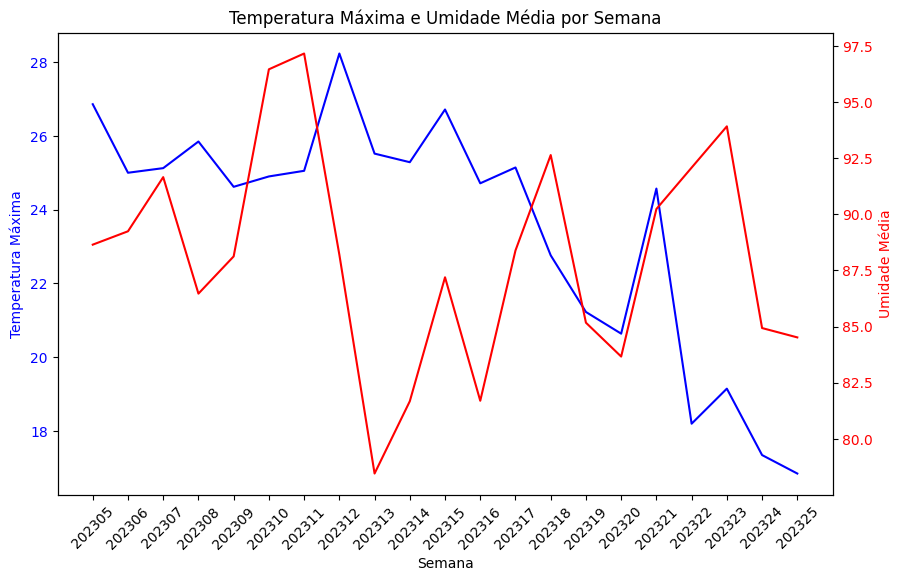

In [42]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotar a temperatura máxima no primeiro eixo y
ax1.plot(filtered_data['SE'], filtered_data['tempmax'], color='blue')
ax1.set_xlabel('Semana')
ax1.set_ylabel('Temperatura Máxima', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar um segundo eixo y para a umidade média
ax2 = ax1.twinx()
ax2.plot(filtered_data['SE'], filtered_data['umidmed'], color='red')
ax2.set_ylabel('Umidade Média', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Temperatura Máxima e Umidade Média por Semana')
for label in ax1.get_xticklabels():
    label.set_rotation(45)
plt.show()

### Correlação de temperatura, umidade. Análise linear

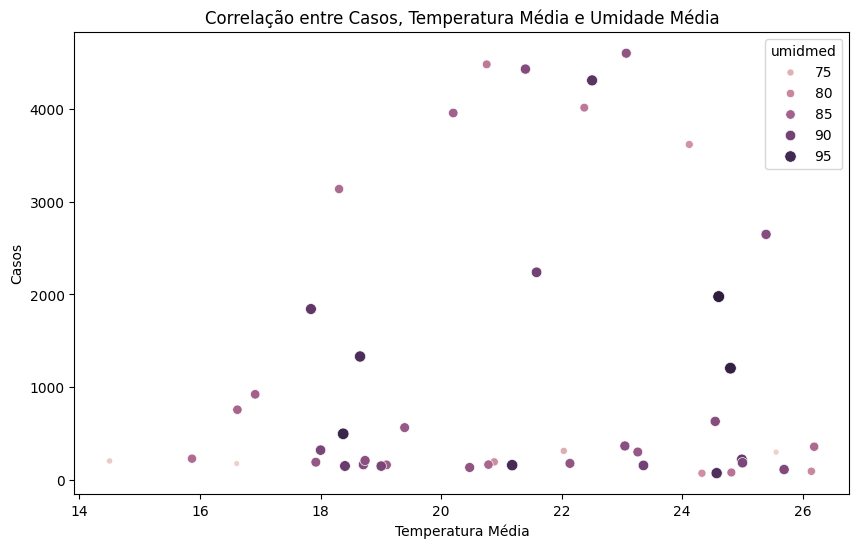

In [31]:
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plotar um gráfico de dispersão com a temperatura média e os casos
sns.scatterplot(x='tempmed', y='casos', hue='umidmed', size='umidmed', data=dados)

plt.xlabel('Temperatura Média')
plt.ylabel('Casos')
plt.title('Correlação entre Casos, Temperatura Média e Umidade Média')
plt.show()

In [60]:
from sklearn.linear_model import LinearRegression

# Criar um DataFrame com as variáveis independentes
X = dados[['tempmed', 'umidmed']]

# Preencher os valores faltantes com a média
X = X.fillna(X.median())

# Criar uma série com a variável dependente
y = dados['casos']

# Criar o modelo de regressão linear
model = LinearRegression()

# Ajustar o modelo aos dados
model.fit(X, y)

# Imprimir os coeficientes do modelo
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -515.518574745776
Coefficients: [30.24858296 10.4058874 ]


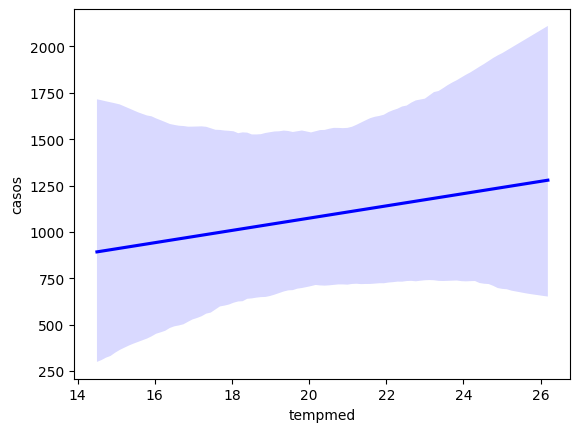

In [63]:
#plote o gráfico de dispersão e a reta de regressão
    #Temperatura Média e Umidade Média')
# usando regplot

sns.regplot(x='tempmed', y='casos', data=dados, scatter=False, color='blue')   


plt.show()

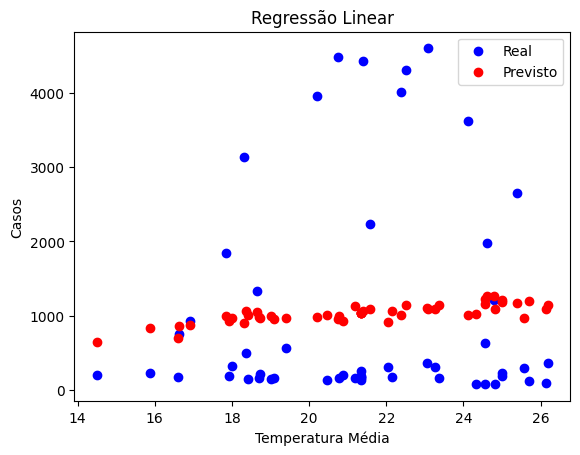

In [33]:
from sklearn.linear_model import LinearRegression

# Criar um DataFrame com as variáveis independentes
X = dados[['tempmed', 'umidmed']]

# Preencher os valores faltantes com a média
X = X.fillna(X.mean())

# Criar uma série com a variável dependente
y = dados['casos']

# Criar o modelo de regressão linear
model = LinearRegression()

# Ajustar o modelo aos dados
model.fit(X, y)

# Fazer previsões com o modelo
y_pred = model.predict(X)

# Criar uma figura
fig, ax = plt.subplots()

# Plotar os valores reais
ax.scatter(X['tempmed'], y, color='blue', label='Real')

# Plotar os valores previstos
ax.scatter(X['tempmed'], y_pred, color='red', label='Previsto')

# Adicionar legendas e título
ax.set_xlabel('Temperatura Média')
ax.set_ylabel('Casos')
ax.set_title('Regressão Linear')
ax.legend()

# Mostrar o gráfico
plt.show()

### Estudo sobre teorema central do limite e amostras

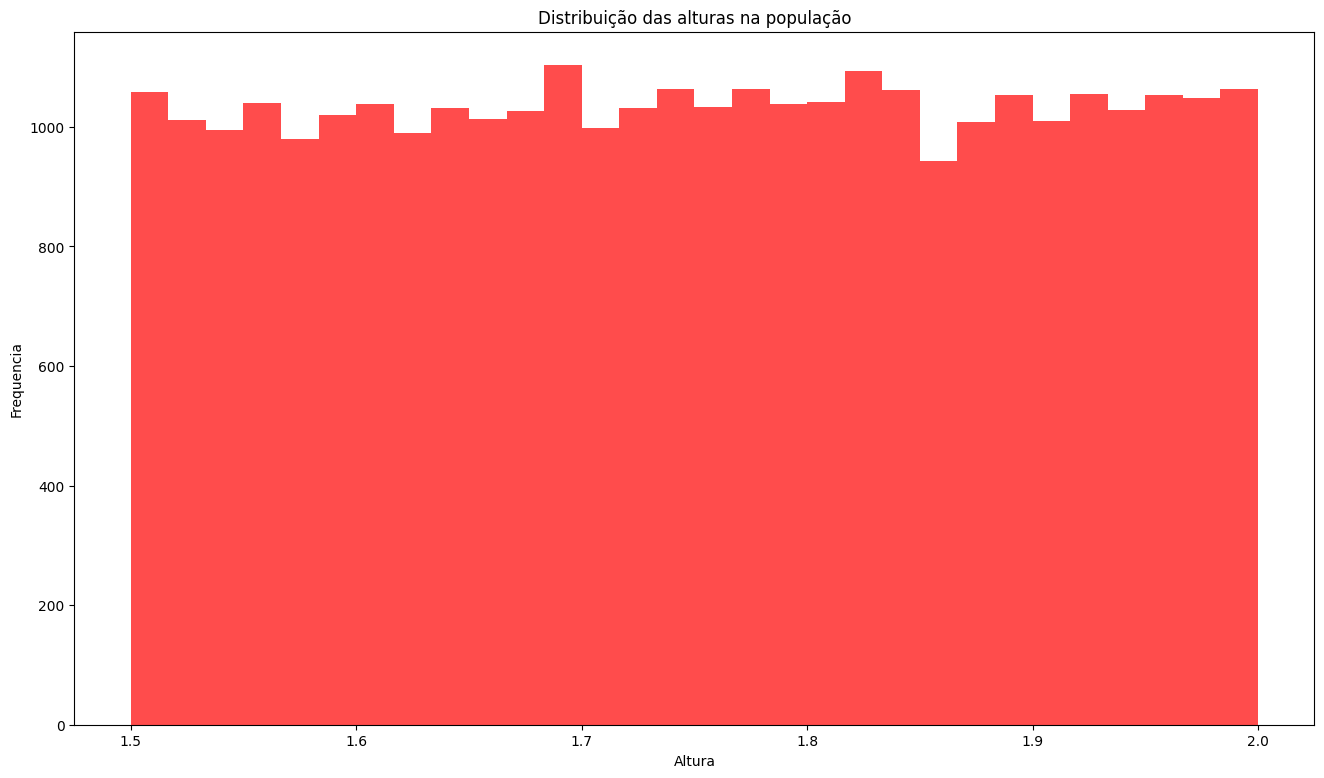

In [34]:
import numpy as np
import matplotlib.pyplot as plt

populacao = np.random.uniform(low= 1.5, high=2.0, size=31000)

plt.figure(figsize=(16,9))
plt.hist(populacao, bins=30, color='red', alpha=0.7)
plt.title('Distribuição das alturas na população')
plt.xlabel('Altura')
plt.ylabel('Frequencia')
plt.show()

In [35]:
media_pop = np.mean(populacao)
desvio_padrao_pop = np.std(populacao)

# printando
print(f'A média da população é {media_pop:.2f}')
print(f'O desvio padrão da população é {desvio_padrao_pop:.2f}')

A média da população é 1.75
O desvio padrão da população é 0.14


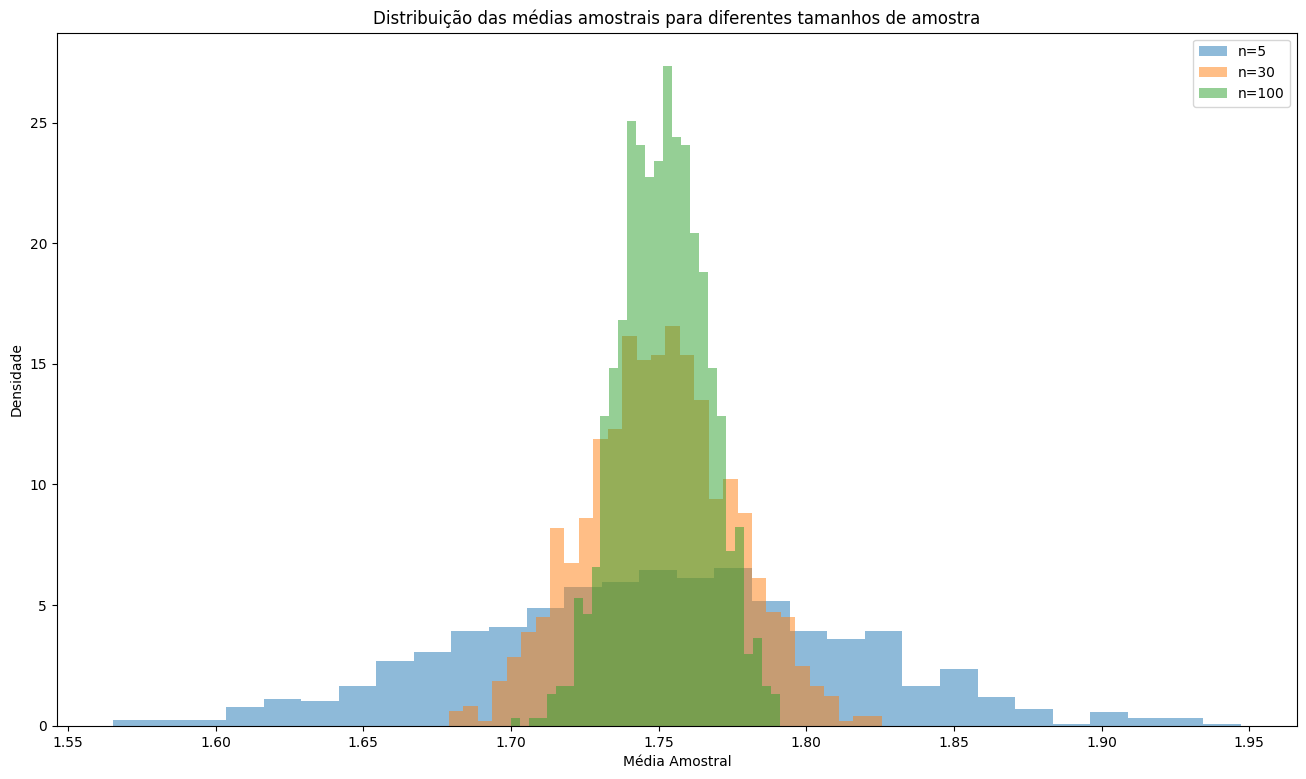

In [38]:
plt.figure(figsize=(16,9))

# Definindo os diferentes tamanhos de amostra a serem utilizados
tamanhos_amostra = [5, 30, 100] 

# Criando um dicionário para armazenar os resultados
resultados = {}

# iterando para cada tamanho diferente de amostra
for n in tamanhos_amostra:
    # escolhe aleatoriamente n observações da pop. e calcula a média
    # o processo é repetido 1000 vezes
    medias_amostrais = [np.mean(np.random.choice(populacao, size=n)) for _ in range(1000)]
    
    # Calculando a média e desvio padrão para cada distribuição
    media_medias = np.mean(medias_amostrais)
    desvio_padrao_TCL = desvio_padrao_pop/np.sqrt(n) # desvio padrão seguindo a fórmula do TCL
    desvio_padrao_medias_amostrais = np.std(medias_amostrais)

    # Armazenando os resultados
    resultados[n] = (media_medias, desvio_padrao_TCL, desvio_padrao_medias_amostrais)
    
    # São gerados 3 histogramas, cada um para um diferente tamanho de amostra
    plt.hist(medias_amostrais, bins=30, density=True, alpha=0.5, label=f'n={n}')

plt.title('Distribuição das médias amostrais para diferentes tamanhos de amostra')
plt.xlabel('Média Amostral')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [39]:
# Printando as médias e desvios padrão para cada tamanho de amostra
for tamanho, (media, desvio_padrao_TCL, desvio_padrao_medias_amostrais) in resultados.items():
    print(f"Tamanho da amostra: {tamanho}")
    print(f"Média das médias amostrais: {media:.4f}")
    print(f"Desvio padrão TCL: {desvio_padrao_TCL:.4f}")
    print(f"Desvio padrão das médias amostrais: {desvio_padrao_medias_amostrais:.4f}")
    print()

Tamanho da amostra: 5
Média das médias amostrais: 1.7500
Desvio padrão TCL: 0.0645
Desvio padrão das médias amostrais: 0.0638

Tamanho da amostra: 30
Média das médias amostrais: 1.7500
Desvio padrão TCL: 0.0263
Desvio padrão das médias amostrais: 0.0250

Tamanho da amostra: 100
Média das médias amostrais: 1.7517
Desvio padrão TCL: 0.0144
Desvio padrão das médias amostrais: 0.0148

